In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
project = os.path.realpath('./..')
datadir = os.path.join(project, 'results\Latency\Twitter Original')
datadir = os.path.join(datadir,'responsetable.csv')
df = pd.read_csv(datadir)

In [78]:
df.columns
df.index

RangeIndex(start=0, stop=1712, step=1)

In [14]:
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1554033565217,5618,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,214739,115,1,1,https://twitter.com/,2631,0,812
1,1554033570839,1952,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,214744,115,1,1,https://twitter.com/,977,0,639
2,1554033572792,898,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,214608,115,1,1,https://twitter.com/,336,0,0
3,1554033573691,1889,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,214740,115,1,1,https://twitter.com/,930,0,601
4,1554033575581,779,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,214611,115,1,1,https://twitter.com/,331,0,0


In [15]:
df.describe()

,timeStamp,elapsed,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.712000e+03,1712.000000,0.0,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.0,1712.000000
mean,1.554034e+12,4271.308995,NaN,213806.299065,114.664136,4.935748,4.935748,1620.626752,0.0,1032.801986
std,4.125059e+05,2922.718180,NaN,11465.911567,6.207586,0.406646,0.406646,855.002198,0.0,549.125552
min,1.554034e+12,779.000000,NaN,1544.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000
25%,1.554034e+12,2595.750000,NaN,213985.000000,115.000000,5.000000,5.000000,1122.000000,0.0,706.750000
50%,1.554034e+12,3259.000000,NaN,214608.000000,115.000000,5.000000,5.000000,1393.000000,0.0,910.000000
75%,1.554035e+12,4600.750000,NaN,214608.000000,115.000000,5.000000,5.000000,1783.250000,0.0,1191.250000
max,1.554035e+12,27600.000000,NaN,214785.000000,115.000000,5.000000,5.000000,10071.000000,0.0,6438.000000


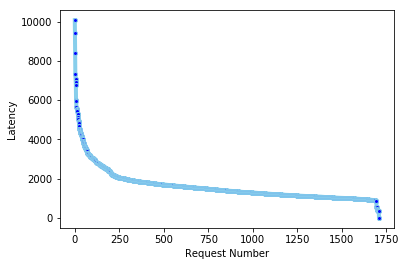

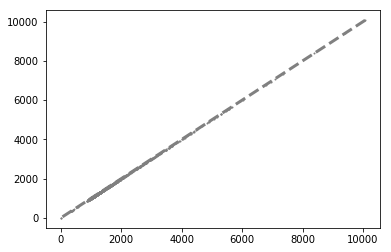

In [128]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.plot(range(0,1712),'Latency', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.show()
df.sort_values(by='Latency',inplace=True, ascending=False)
plt.plot('Latency','Latency', data=df, marker='o', markerfacecolor='grey', markersize=1, color='grey', linewidth=3,linestyle='dashed')

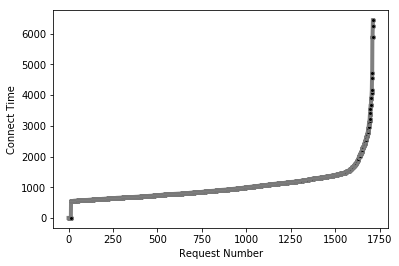

In [136]:
#ConnectTime
plt.xlabel('Request Number')
plt.ylabel('Connect Time')
df.sort_values(by='Connect',inplace=True)
plt.plot(range(0,1712),'Connect', data=df, marker='o', markerfacecolor='black', markersize=4, color='grey', linewidth=4)

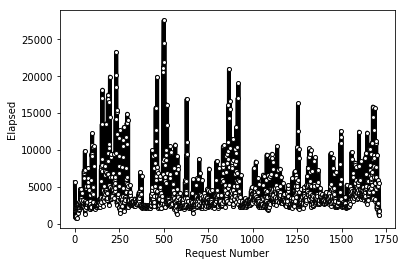

In [99]:
#Elapsed
#Elapsed = RequestTime+ResponseTime
plt.xlabel('Request Number')
plt.ylabel('Elapsed')
plt.plot( range(0,1712),'elapsed', data=df, marker='o', markerfacecolor='white', markersize=4, color='black', linewidth=4)

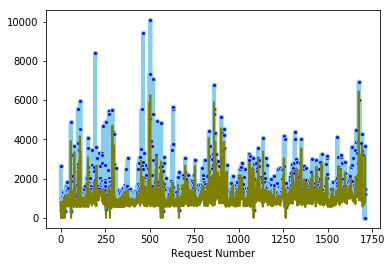

In [103]:
#Connection Time and Latency
plt.xlabel('Request Number')
plt.plot(range(0,1712),'Latency', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot( 'Connect', '', data=df,  marker='', color='olive', linewidth=2)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)

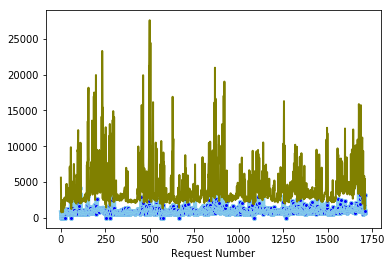

In [105]:
#Connection Time and Latency
plt.xlabel('Request Number')
plt.plot(range(0,1712),'Connect', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)
#plt.plot( 'elapsed', '', data=df,  marker='', color='olive', linewidth=2)

In [111]:
print(type(df['Latency'][0]))
print(type(df['Connect'][0]))
df['LatencyConnect'] = df['elapsed'] - df['Connect']

<class 'numpy.int64'>
<class 'numpy.int64'>


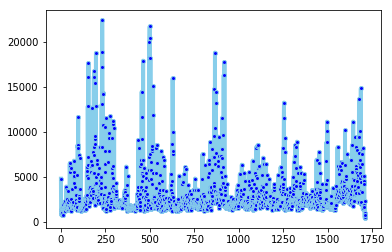

In [112]:
plt.plot(range(0,1712),'LatencyConnect', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)